# CS5617: Data Science Project

**Install Dependencies**

In [0]:
!pip install joblib
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install treeinterpreter
!pip install seaborn

**Import Libraries**

In [0]:
import joblib
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from treeinterpreter import treeinterpreter as ti
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Load Data set CVS file from the file system**

In [32]:
df = pd.read_csv('TelcoChurnDataset.csv')
df.head()

,CustomerId,Age,Gender,isCustomerSuspended,CallDropRate,NumberOfComplaints,MonthlyBilledAmount - Rs,UnpaidBalance - Rs,NumberOfMonthUnpaid,TotalMinsUsedInLastMonth,TotalCallDuration,AvgCallDuration,PercentageCallOutsideNetwork,isChurned
0,1,12,Male,Yes,0.06,0,2430,870,7,15,5971,663,0.82,No
1,2,42,Female,Yes,0.05,1,540,1320,4,212,7379,737,0.27,No
2,3,58,Female,Yes,0.07,0,780,4620,2,216,3122,624,0.48,No
3,4,20,Male,Yes,0.05,1,2520,5070,7,412,834,834,0.94,No
4,5,36,Male,Yes,0.07,0,2730,870,5,416,1886,628,0.15,No


**Print Pandas Data frame information**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerId                    9490 non-null   int64  
 1   Age                           9490 non-null   int64  
 2   Gender                        9490 non-null   object 
 3   isCustomerSuspended           9490 non-null   object 
 4   CallDropRate                  9490 non-null   float64
 5   NumberOfComplaints            9490 non-null   int64  
 6   MonthlyBilledAmount - Rs      9490 non-null   int64  
 7   UnpaidBalance - Rs            9490 non-null   int64  
 8   NumberOfMonthUnpaid           9490 non-null   int64  
 9   TotalMinsUsedInLastMonth      9490 non-null   int64  
 10  TotalCallDuration             9490 non-null   int64  
 11  AvgCallDuration               9490 non-null   int64  
 12  PercentageCallOutsideNetwork  9490 non-null   float64
 13  isC

**Map categorical data in to numeric value**

In [34]:
df['isCustomerSuspended'] = df['isCustomerSuspended'].map({'Yes': 1, 'No': 0})
df['isChurned'] = df['isChurned'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df = df.rename(columns={"MonthlyBilledAmount - Rs": "MonthlyBilledAmount",
                        "UnpaidBalance - Rs": "UnpaidBalance"
                                          })
df.head()


,CustomerId,Age,Gender,isCustomerSuspended,CallDropRate,NumberOfComplaints,MonthlyBilledAmount,UnpaidBalance,NumberOfMonthUnpaid,TotalMinsUsedInLastMonth,TotalCallDuration,AvgCallDuration,PercentageCallOutsideNetwork,isChurned
0,1,12,1,1,0.06,0,2430,870,7,15,5971,663,0.82,0
1,2,42,0,1,0.05,1,540,1320,4,212,7379,737,0.27,0
2,3,58,0,1,0.07,0,780,4620,2,216,3122,624,0.48,0
3,4,20,1,1,0.05,1,2520,5070,7,412,834,834,0.94,0
4,5,36,1,1,0.07,0,2730,870,5,416,1886,628,0.15,0


**Remove unnessasary columns and fill NA with zero's**

In [35]:
data = df.drop("CustomerId", axis=1)
data = df.fillna(0)
data.shape

(9490, 14)

***Print Class distridution***

In [36]:
non_churned_count = data['isChurned'].value_counts()[0]
churned_count = data['isChurned'].value_counts()[1]
print(f"Non churned: {round(non_churned_count/(non_churned_count + churned_count) * 100, 2)}% ; Churned: "
              f"{round((churned_count/(non_churned_count + churned_count)) * 100, 2)}% \n \n")

Non churned: 90.96% ; Churned: 9.04% 
 



***Visualize Class distridution***

No handles with labels found to put in legend.


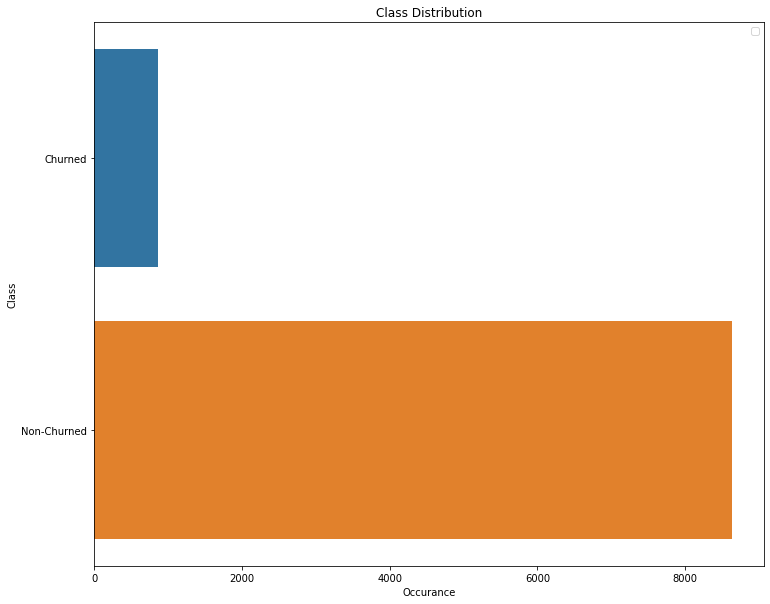

In [37]:
sns.barplot(x=[churned_count, non_churned_count], y=['Churned', 'Non-Churned'])

# Add labels to your graph
plt.xlabel('Occurance')
plt.ylabel('Class')
plt.title("Class Distribution")
plt.legend()
plt.show()

**Compare the Correlation of Featured**

In [0]:

data_corr = df.drop(['CustomerId','isCustomerSuspended','NumberOfComplaints','isChurned', 'Gender'], axis=1)

feature_labels = list(data_corr.columns)


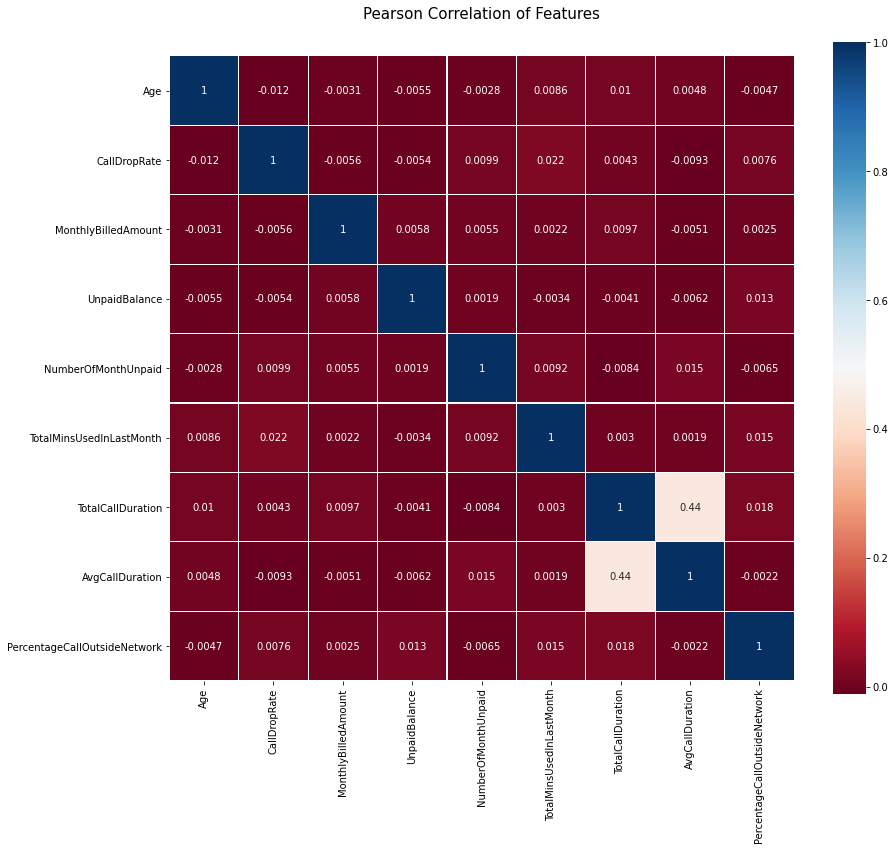

In [39]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**To Comapare the data get all the data into one scale**

Maximum_occ_np:[79.]
1.0
Maximum_occ_np:[1.90308999]
1.0
Maximum_occ_np:[4.38202663]
1.0
Maximum_occ_np:[0.07]
1.0
Maximum_occ_np:[0.02938378]
1.0
Maximum_occ_np:[0.06765865]
1.0
Maximum_occ_np:[3870.]
0.9999999999999999
Maximum_occ_np:[3.58782317]
1.0
Maximum_occ_np:[8.26126815]
1.0
Maximum_occ_np:[7770.]
1.0
Maximum_occ_np:[3.89047691]
1.0000000000000002
Maximum_occ_np:[8.95815414]
1.0
Maximum_occ_np:[499.]
0.9999999999999999
Maximum_occ_np:[2.69897]
1.0
Maximum_occ_np:[6.2146081]
1.0
Maximum_occ_np:[16662.]
1.0
Maximum_occ_np:[4.22175319]
1.0
Maximum_occ_np:[9.72094597]
1.0


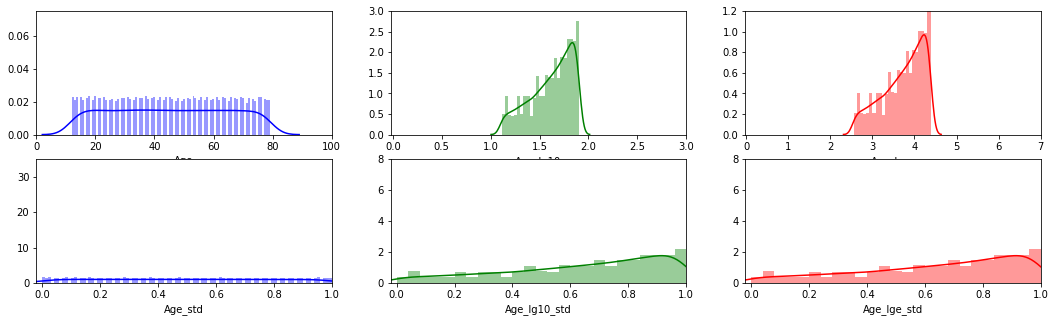

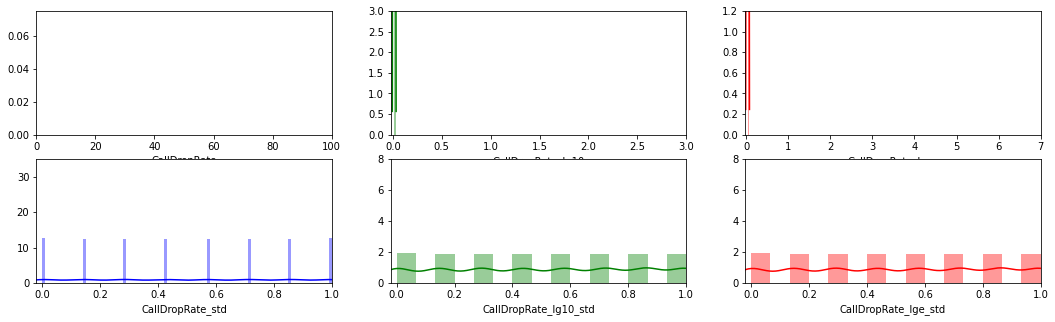

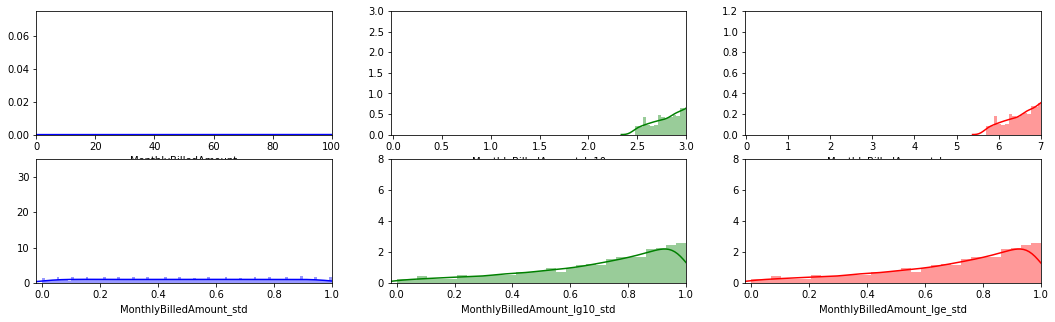

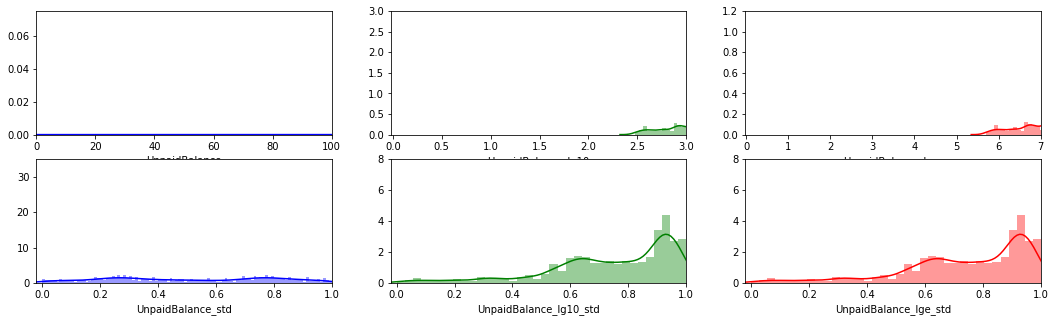

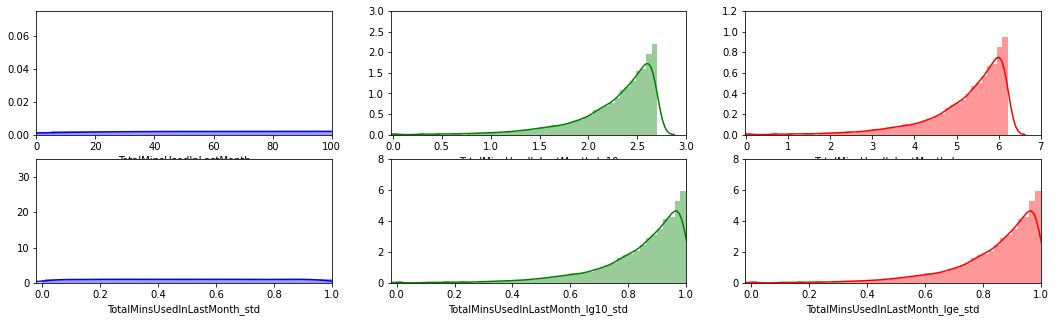

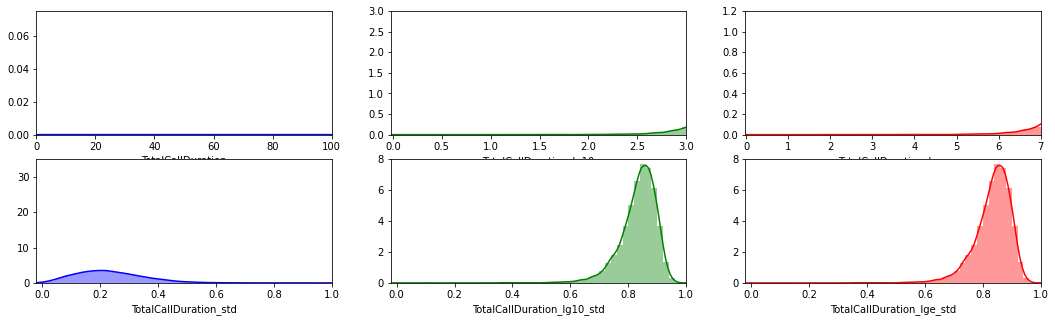

In [40]:
columns_to_convert = ['Age', 'CallDropRate', 'MonthlyBilledAmount', 'UnpaidBalance', 'TotalMinsUsedInLastMonth', 'TotalCallDuration']
scaler = MinMaxScaler()

for item in columns_to_convert:
  d = df[item]
  type(d)
  d_np = d.to_numpy()
  d_np = d_np.reshape(df.shape[0],1)

  scaler.fit(d_np)
  print("Maximum_occ_np:" + str(scaler.data_max_))
  d_std = scaler.transform(d_np)
  print(d_std.max())

  d_lg10 = np.log10(d_np + 1)
  scaler.fit(d_lg10)
  print("Maximum_occ_np:" + str(scaler.data_max_))
  d_lg10_std = scaler.transform(d_lg10)
  print(d_lg10_std.max())

  d_lge = np.log(d_np + 1)
  scaler.fit(d_lge)
  print("Maximum_occ_np:" + str(scaler.data_max_))
  d_lge_std = scaler.transform(d_lge)
  print(d_lge_std.max())

  f, axes = plt.subplots(2, 3, figsize=(18, 5), sharex=False)

  ax1 = sns.distplot(d_np, bins=100, color="b" , ax = axes[0, 0])
  ax1.set_xlim(0, 100)
  ax1.set_ylim(0, 0.075)
  ax1.set(xlabel=item)

  ax2 = sns.distplot(d_lg10, color="g", ax = axes[0, 1])
  ax2.set_xlim(-.02, 3)
  ax2.set_ylim(0, 3)
  ax2.set(xlabel=item + '_lg10')

  ax3 = sns.distplot(d_lge, color="r", ax = axes[0, 2])
  ax3.set_xlim(-.02, 7)
  ax3.set_ylim(0, 1.2)
  ax3.set(xlabel=item + '_lg_e')

  ax4 = sns.distplot(d_std, bins=100, color="b" , ax = axes[1, 0])
  ax4.set_xlim(-.02, 1)
  ax4.set_ylim(0, 35)
  ax4.set(xlabel=item + '_std')

  ax5 = sns.distplot(d_lg10_std, color="g", ax = axes[1, 1])
  ax5.set_xlim(-.02, 1)
  ax5.set_ylim(0, 8)
  ax5.set(xlabel=item + '_lg10_std')

  ax6 = sns.distplot(d_lge_std, color="r", ax = axes[1, 2])
  ax6.set_xlim(-.02, 1)
  ax6.set_ylim(0, 8)
  ax6.set(xlabel=item + '_lge_std')

In [0]:
df = df.drop("CustomerId", axis=1)
df.head()

df_ = df[['Age','CallDropRate','NumberOfComplaints', 'UnpaidBalance','Gender',
                            'NumberOfMonthUnpaid','isChurned']]

scaler = StandardScaler()

train_dataset = df_.sample(frac=0.80, random_state=0)
test_dataset = df_.drop(train_dataset.index)
train_labels = train_dataset.pop('isChurned')
test_labels = test_dataset.pop('isChurned')
scaler.fit(train_dataset)

train_dataset.head()

In [0]:
train_dataset_scaled = scaler.transform(train_dataset)
test_dataset_scaled = scaler.transform(test_dataset)

In [44]:
cols = train_dataset.columns
train_dataset_normalized = pd.DataFrame(train_dataset_scaled, columns = cols)
train_dataset_normalized.head()

,Age,CallDropRate,NumberOfComplaints,UnpaidBalance,Gender,NumberOfMonthUnpaid
0,0.492985,0.212919,-0.451144,-1.673400,-0.980013,0.221005
1,-0.936672,0.647235,-1.345103,-0.679750,1.020394,-1.090191
2,0.901458,-1.090030,-1.345103,1.279158,-0.980013,-0.653126
3,0.084512,-0.221397,1.336774,-0.892675,1.020394,1.095136
4,-0.323962,-0.655713,-0.451144,0.952673,1.020394,-0.216060


In [45]:
test_dataset_normalized = pd.DataFrame(test_dataset_scaled, columns = cols)
test_dataset_normalized.head()

,Age,CallDropRate,NumberOfComplaints,UnpaidBalance,Gender,NumberOfMonthUnpaid
0,0.390867,-1.524346,0.442815,-1.318525,-0.980013,-1.090191
1,-1.294086,-0.655713,-0.451144,0.725553,-0.980013,-1.527257
2,-0.579258,1.081551,-0.451144,-1.048820,1.020394,1.095136
3,1.412050,1.081551,-1.345103,0.938478,-0.980013,1.532201
4,-1.498323,-1.090030,-1.345103,0.924283,-0.980013,0.221005


**Rectifiy the class imbalance**

In [49]:
smote = SMOTE(ratio='minority')
X_train, y_train = smote.fit_sample(train_dataset, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
non_churned_count = (pd.DataFrame(y_train))[0].value_counts()[0]
churned_count = (pd.DataFrame(y_train))[0].value_counts()[1]
print((pd.DataFrame(y_train))[0].value_counts())
print(f"Non churned in Training Set: {round(non_churned_count/(non_churned_count + churned_count) * 100, 2)}% ; "
            f"Churned in Training Set: "
            f"{round((churned_count/(non_churned_count + churned_count)) * 100, 2)}% \n \n")

1    8207
0    8207
Name: 0, dtype: int64
Non churned in Training Set: 50.0% ; Churned in Training Set: 50.0% 
 



No handles with labels found to put in legend.


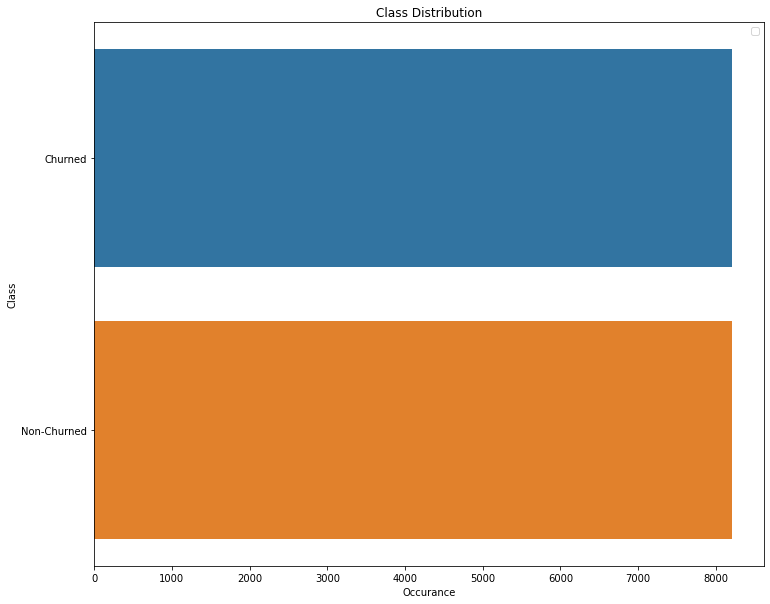

In [51]:
sns.barplot(x=[churned_count, non_churned_count], y=['Churned', 'Non-Churned'])

# Add labels to your graph
plt.xlabel('Occurance')
plt.ylabel('Class')
plt.title("Class Distribution")
plt.legend()
plt.show()

**Running Random Forest Classifier**

In [53]:
clf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
clf.fit(X_train, y_train)
feature_imp = pd.Series(clf.feature_importances_,index=train_dataset.columns).sort_values(ascending=False)
feature_imp

NumberOfComplaints     0.274672
Gender                 0.207366
Age                    0.153499
UnpaidBalance          0.142021
CallDropRate           0.113549
NumberOfMonthUnpaid    0.108894
dtype: float64

**Visualize the important features**

No handles with labels found to put in legend.


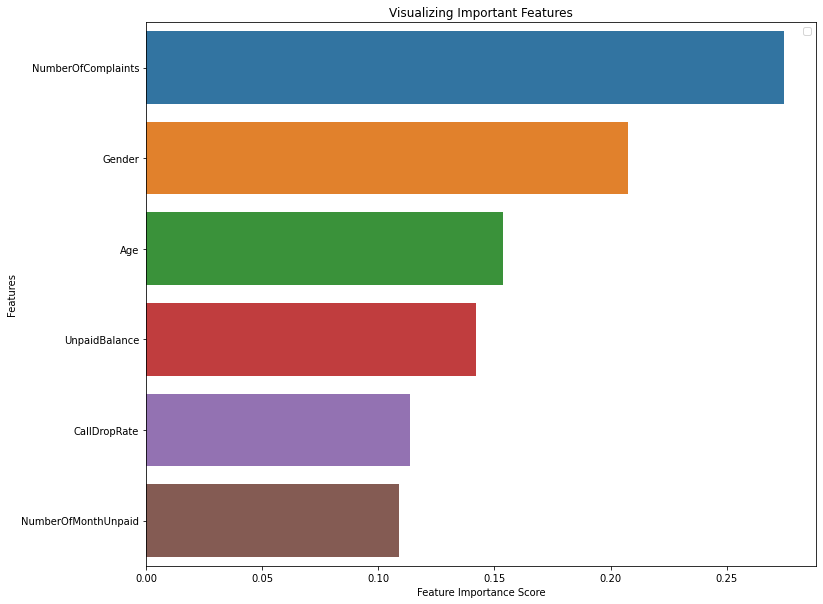

In [54]:
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

**Calculating the Accuracy**

In [56]:
predicted = clf.predict(test_dataset_scaled)
report = classification_report(test_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       425
           1       0.12      0.35      0.17        49

    accuracy                           0.66       474
   macro avg       0.51      0.52      0.48       474
weighted avg       0.82      0.66      0.72       474



In [58]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predicted))

Accuracy: 0.6582278481012658


In [130]:
print(clf.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>


In [0]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

dotfile = six.StringIO()
i_tree = 0

estimator = clf.estimators_[100]

# Export as dot file
export_graphviz(estimator, out_file='test1.dot', 
                feature_names = feature_labels,
                class_names = ['1','0'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [0]:
!dot test1.dot -Tpng -o test1.png

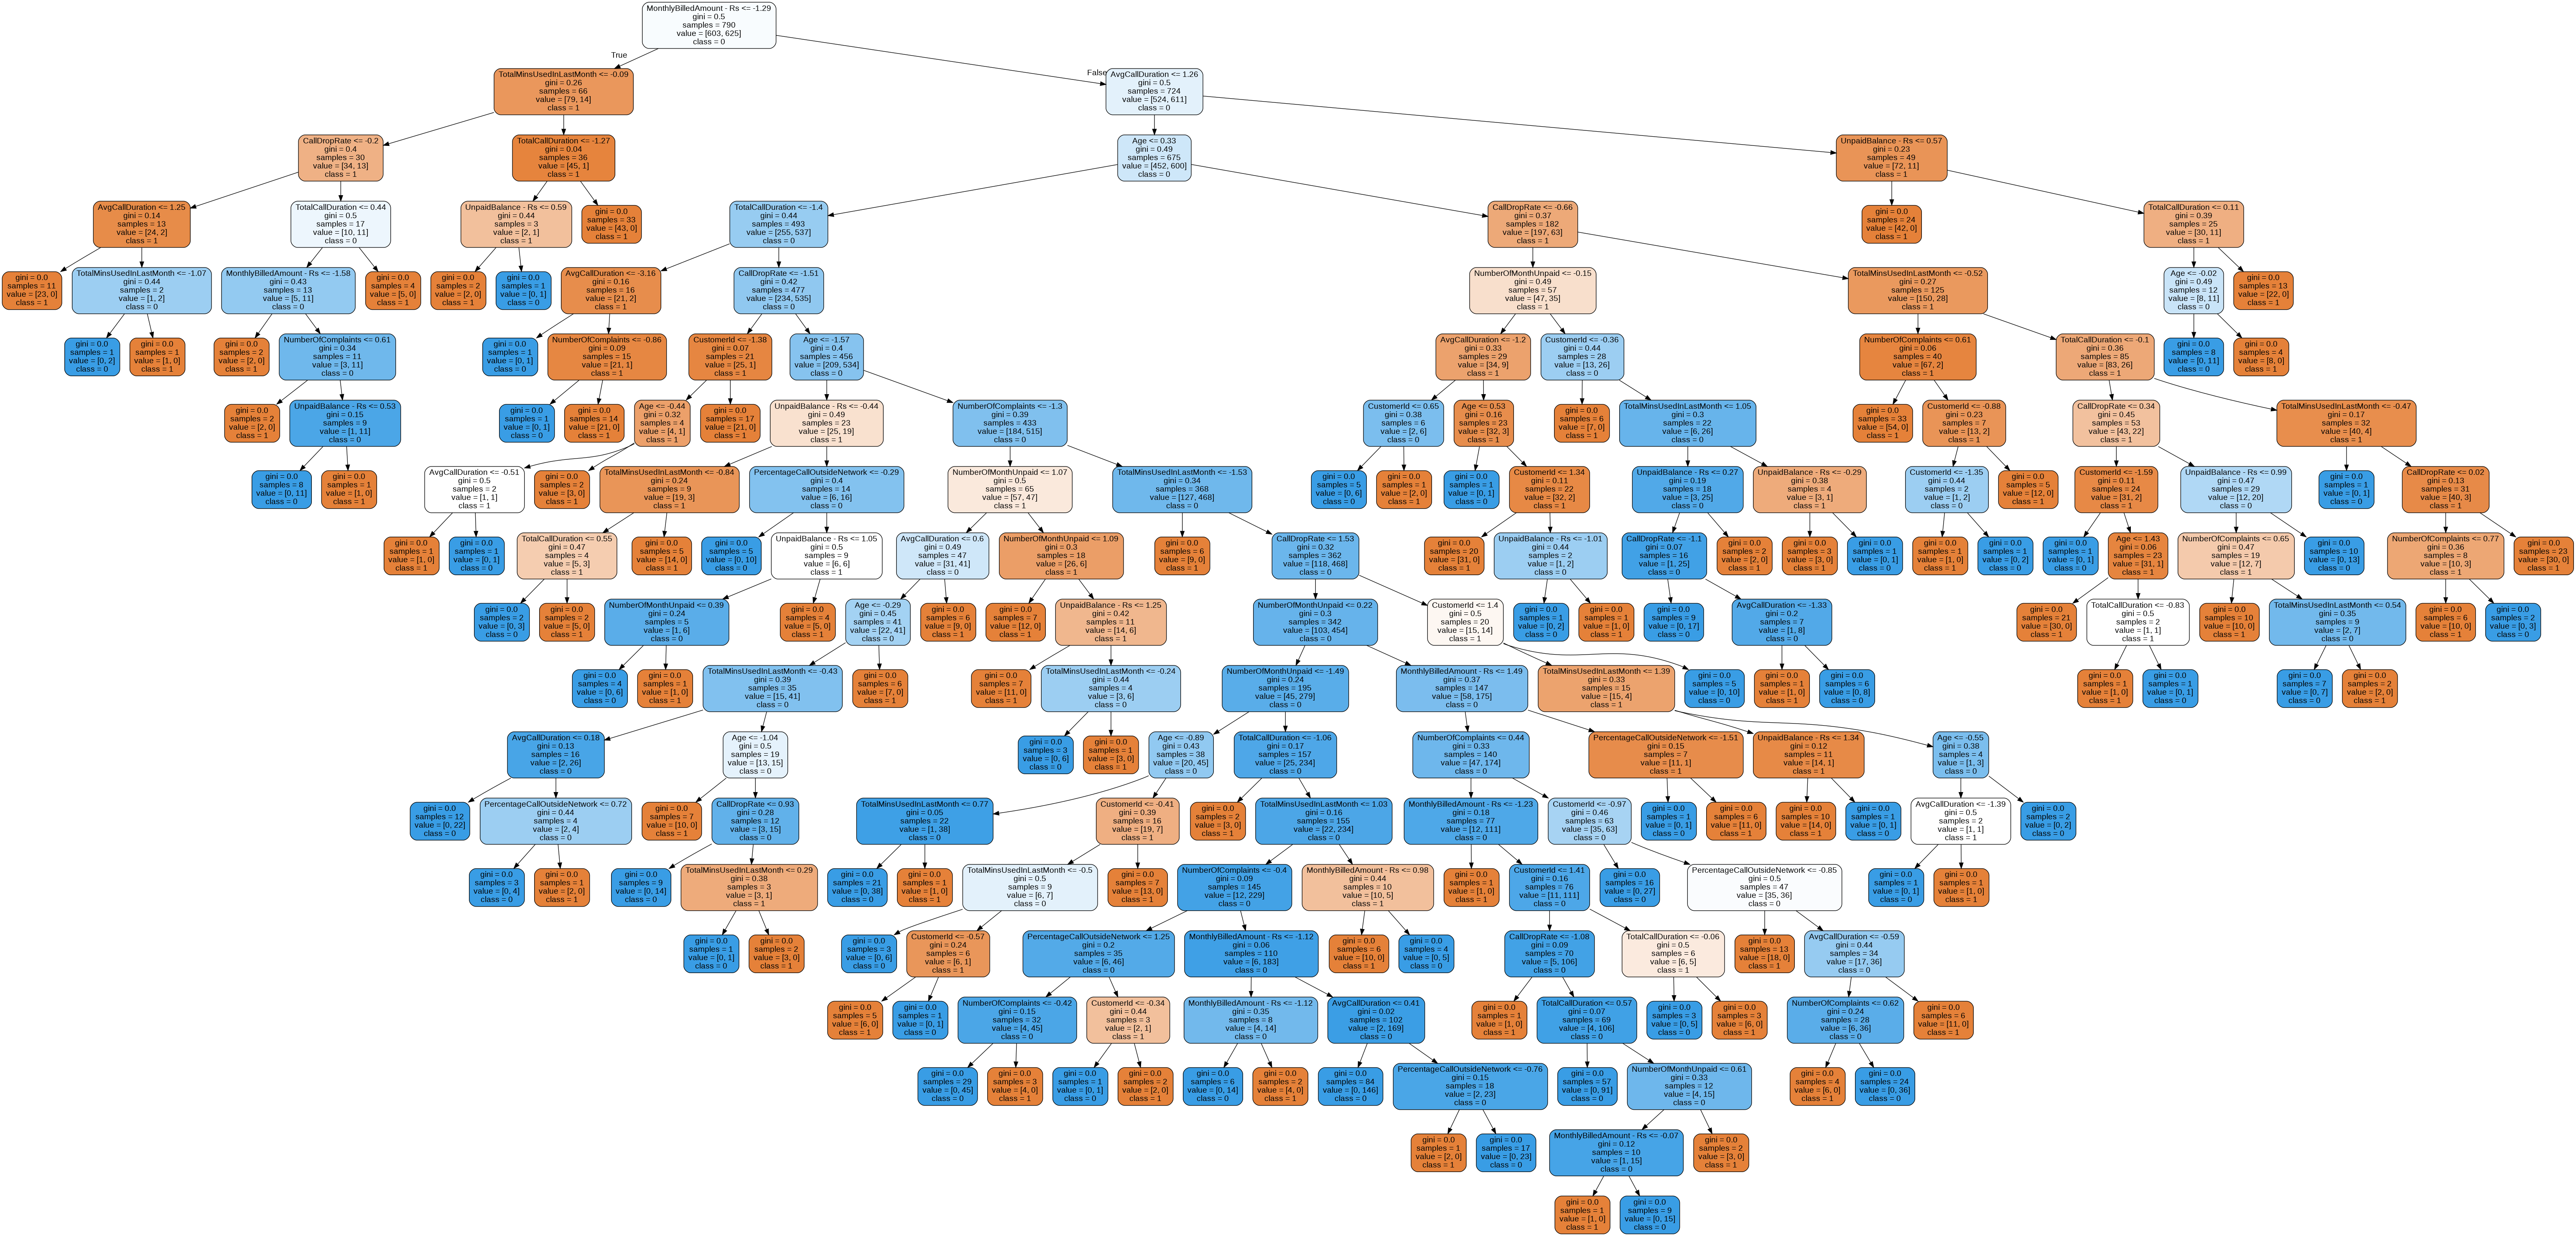

In [44]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'test1.png')